In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mask_pred_dict.csv', header=None, names=['file','mean_mask'])
df['synset'] = df['file'].apply(lambda x: x.split('_')[0])
synset = df.groupby('synset').agg({'file':'count','mean_mask':'mean'}).sort_values('mean_mask', ascending=False)
df['synset_count'] = df['synset'].map(synset['file'])
df.head()

,file,mean_mask,synset,synset_count
0,n11665372_10017_1.jpg,0.645231,n11665372,2920
1,n11665372_10017_2.jpg,0.641856,n11665372,2920
2,n11665372_10020_1.jpg,0.580223,n11665372,2920
3,n11665372_10020_2.jpg,0.551913,n11665372,2920
4,n11665372_10043_1.jpg,0.862297,n11665372,2920


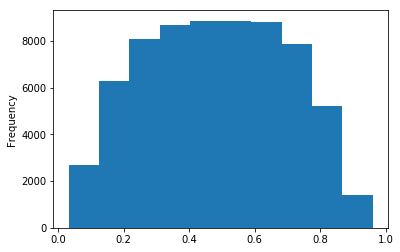

In [3]:
sampled_df = df.loc[(df['synset']!='n11669921')
                   &(df['synset']!='n11665372')
                   &(df['file'].str.endswith('_1.jpg'))].sample(60000, weights=(1-df['mean_mask'])/(df['synset_count']))
sampled_df = sampled_df.append(df.loc[(df['synset']=='n11669921')|(df['synset']=='n11665372')])
sampled_df['mean_mask'].plot.hist()
plt.show()

In [4]:
sampled_df.to_csv('mask_pred_dict_sampled.csv', index=False)